# Inverse problem
known: all data  
unknown: k8, ka, k5, h5  
results record: https://outlookuga-my.sharepoint.com/:x:/r/personal/yq88347_uga_edu/_layouts/15/Doc.aspx?sourcedoc=%7Be6449b96-7895-43ff-a1e4-42fc2118f900%7D&action=editnew

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

import tensorflow as tf
import models_tf as models

In [2]:
# data = sio.loadmat("../test.mat")
data = sio.loadmat("../../data/data_2k_points.mat")
c0 = data["IC"]
t = data["t"]
c_ref = data["y"]

t_train = t

scale = np.array(
    [10, 1, 100, 100, 0.0001, 10, 0.1, 1000]
).reshape([-1])
c_ref = c_ref / scale
c0 = c0 / scale

In [3]:
np.max(t)

100.0

In [4]:
len(t)

2000

In [5]:
np.max(data["y"], axis=0)

array([2.99999999e+01, 3.54115121e+00, 8.57923329e+02, 1.00000000e+03,
       1.13698673e-03, 3.83874944e+01, 8.68819961e-01, 2.16923077e+03])

In [6]:
model = models.PINN(
    c0=c0,
    output_dim=8,
    scale=scale,
    units=100, 
    activation=tf.tanh,
    eps=1e-5,
)

eps:  tf.Tensor(1e-05, shape=(), dtype=float32)


In [7]:
# t_ode = t_train[::10]
# t_u = t_train
# u = c_ref
t_ode = t_train[:201]
t_u = t_train
u = c_ref
loss, ode_loss, data_loss, min_loss, h5_list = model.train(t_ode, t_u, u, niter=500000)

2024-01-03 15:51:54.269496: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


0 9.846097 695148.5 2.8946123 69395915000.0 11.893609 0.9990011
1000 0.18967666 25.763199 0.18941903 461365.44 0.21149543 0.64937395
2000 0.090925366 30.066957 0.0906247 325348.34 0.26813474 0.34141576
3000 0.055920333 109.9143 0.05482119 182372.58 1.0809058 0.196896
4000 0.048418015 144.77884 0.046970226 544423.56 1.3933461 0.119770445
5000 0.045784704 119.89793 0.044585723 192109.4 1.1797683 0.07196911
6000 0.044942394 108.65989 0.043855794 182060.1 1.0683929 0.044081207
7000 0.07927197 3502.7505 0.044244472 338151260.0 1.2123797 0.027411362
8000 0.044756807 115.14152 0.04360539 1252861.8 1.026129 0.017348325
9000 0.044560924 108.3908 0.043477017 342046.66 1.0497034 0.011144762
10000 0.044401377 107.00541 0.043331325 343209.88 1.0357331 0.007239849
11000 0.04452796 129.30771 0.04323488 2921424.5 1.0009346 0.0047458406
12000 0.044188507 105.32075 0.0431353 1063256.0 0.94688183 0.003146917
13000 0.04376866 93.25601 0.0428361 3620190.2 0.57054114 0.002193541
14000 0.045204066 232.16672 

105000 3.147386e-05 0.041012336 3.1063737e-05 0.040170424 0.00041011933 0.30287412
106000 3.5157926e-05 0.09119837 3.4245943e-05 0.06840197 0.00091197685 0.30306342
107000 1.7905077e-05 0.016352281 1.7741553e-05 0.029148372 0.0001635199 0.3032755
108000 8.989334e-07 0.0046803476 8.5213e-07 0.029056005 4.680057e-05 0.30337164
109000 8.309764e-05 0.095974915 8.213789e-05 0.029711766 0.00095974613 0.3037214
110000 4.596723e-05 0.092356265 4.5043667e-05 0.056009408 0.0009235571 0.3038908
111000 3.0734086e-06 0.0029759256 3.0436493e-06 0.031030986 2.9756151e-05 0.304034
112000 2.0722696e-06 0.01847892 1.8874805e-06 0.029968068 0.0001847862 0.30424207
113000 2.193438e-06 0.002120374 2.1722342e-06 0.030942397 2.1200645e-05 0.3044828
114000 2.2127085e-06 0.0018672174 2.1940364e-06 0.025225298 1.866965e-05 0.30473158
115000 1.5267501e-06 0.0030989214 1.4957609e-06 0.030581066 3.0986157e-05 0.30493236
116000 2.8829281e-06 0.0046370444 2.8365578e-06 0.029765135 4.6367466e-05 0.3051303
117000 2.14

205000 8.551061e-06 0.0052275173 8.498786e-06 0.18132907 5.225704e-05 0.32520434
206000 1.5470341e-05 0.016046114 1.530988e-05 0.16870503 0.00016044427 0.325362
207000 3.056328e-05 0.019608881 3.036719e-05 0.14751364 0.00019607406 0.32551944
208000 2.1141774e-05 0.06594214 2.0482352e-05 0.1912682 0.0006594022 0.3256805
209000 1.1417059e-05 0.0024502652 1.1392556e-05 0.17239118 2.4485413e-05 0.32575756
210000 2.213899e-06 0.003955283 2.1743463e-06 0.17965303 3.953487e-05 0.3259016
211000 3.7582613e-06 0.002368392 3.7345774e-06 0.17952667 2.3665967e-05 0.32595474
212000 1.34140355e-05 0.020030577 1.3213729e-05 0.170968 0.00020028866 0.3259102
213000 2.6055042e-07 0.0016352652 2.4419776e-07 0.19630598 1.633302e-05 0.32614282
214000 1.4551996e-05 0.01227939 1.4429203e-05 0.2052855 0.00012277337 0.32614478
215000 0.0001108719 0.087857164 0.00010999333 0.15881406 0.00087855576 0.32625186
216000 1.0677165e-05 0.015816227 1.0519003e-05 0.22346081 0.00015813991 0.3261951
217000 1.1612413e-05 0.

306000 1.2515864e-05 0.017525917 1.2340605e-05 0.54677004 0.00017520449 0.2961353
307000 0.0001008972 0.057485063 0.00010032235 0.75525653 0.0005747751 0.29616216
308000 5.902085e-06 0.007083698 5.831248e-06 0.61808074 7.0775175e-05 0.2959795
309000 4.460383e-05 0.010866679 4.4495162e-05 0.3354618 0.00010863325 0.2957963
310000 1.0023166e-05 0.007037729 9.952789e-06 0.60914034 7.0316375e-05 0.29564774
311000 1.7163618e-06 0.0024745075 1.6916167e-06 0.634766 2.46816e-05 0.2954111
312000 9.149158e-06 0.0033430557 9.115728e-06 0.65200907 3.3365355e-05 0.29530424
313000 8.14056e-06 0.003132577 8.109234e-06 0.51190925 3.127458e-05 0.29516584
314000 3.7130403e-06 0.004400268 3.6690376e-06 0.5320133 4.394948e-05 0.29497305
315000 1.0225886e-05 0.010841614 1.011747e-05 0.68576556 0.000108347565 0.2949854
316000 1.9239564e-05 0.002344118 1.9216122e-05 0.73811334 2.3367367e-05 0.29482958
317000 5.1503484e-06 0.015089154 4.999457e-06 0.7321988 0.00015081832 0.29469094
318000 6.033191e-07 0.001888

408000 5.497164e-06 0.009000364 5.40716e-06 0.99668664 8.9903966e-05 0.2973304
409000 2.7953786e-06 0.0024074349 2.7713043e-06 1.1500975 2.395934e-05 0.29818293
410000 4.0976018e-05 0.021462223 4.0761395e-05 1.4573569 0.00021447649 0.29931185
411000 2.2088398e-05 0.0115449 2.1972948e-05 1.2993734 0.00011531906 0.30002293
412000 6.619535e-07 0.0018426892 6.435266e-07 1.0988734 1.8317005e-05 0.2999479
413000 2.1179925e-05 0.0029648824 2.1150276e-05 1.0802767 2.9540795e-05 0.29966727
414000 4.6785076e-06 0.005408235 4.6244254e-06 0.8931206 5.3993037e-05 0.2993559
415000 7.682167e-06 0.0065740617 7.6164265e-06 1.1902148 6.562159e-05 0.2990845
416000 1.8987532e-05 0.010238529 1.8885146e-05 1.252721 0.00010226002 0.29853523
417000 5.284775e-05 0.010790324 5.2739848e-05 1.3469993 0.000107768545 0.29816806
418000 6.6048783e-06 0.020560069 6.3992775e-06 1.1849551 0.0002054822 0.29775152
419000 1.251082e-05 0.0021807293 1.2489013e-05 1.1393645 2.1693357e-05 0.29729757
420000 1.22059455e-05 0.002

In [8]:
min_loss

8.999351e-08

In [9]:
model.restore()
c_pred = model.call(
    tf.constant(t_train, tf.float32),
)

In [10]:
L2 = np.sqrt(np.sum((c_pred - c_ref) ** 2, axis=0) / np.sum(c_ref ** 2, axis=0))

In [11]:
L2

array([6.00376171e-05, 6.89744817e-04, 4.34909642e-04, 1.89488479e-04,
       4.84017265e-04, 5.69446674e-04, 1.53770685e-04, 1.16328217e-04])

In [12]:
# ka = 1.2
print(tf.math.exp(model.log_ka))

tf.Tensor(1.2011776, shape=(), dtype=float32)


In [13]:
# k8 = 0.00001
print(tf.math.exp(model.log_k8))

tf.Tensor(9.852792e-06, shape=(), dtype=float32)


In [14]:
# k5 = 0.17
print(tf.math.exp(model.log_k5))

tf.Tensor(0.1690074, shape=(), dtype=float32)


In [15]:
# h5 = 0.31
print(tf.math.exp(model.log_h5))

tf.Tensor(0.29269677, shape=(), dtype=float32)


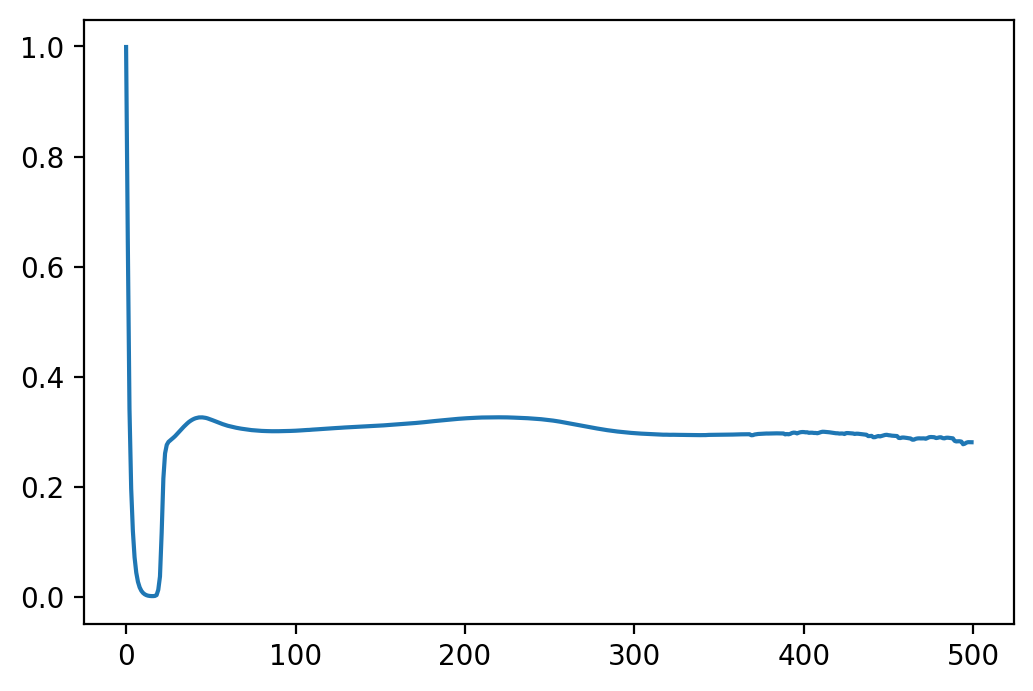

In [16]:
plt.figure(dpi=200)
plt.plot(h5_list[::1000], "-", label="reference")
# plt.plot(np.log(loss)[::1000], "-", label="reference")
plt.show()

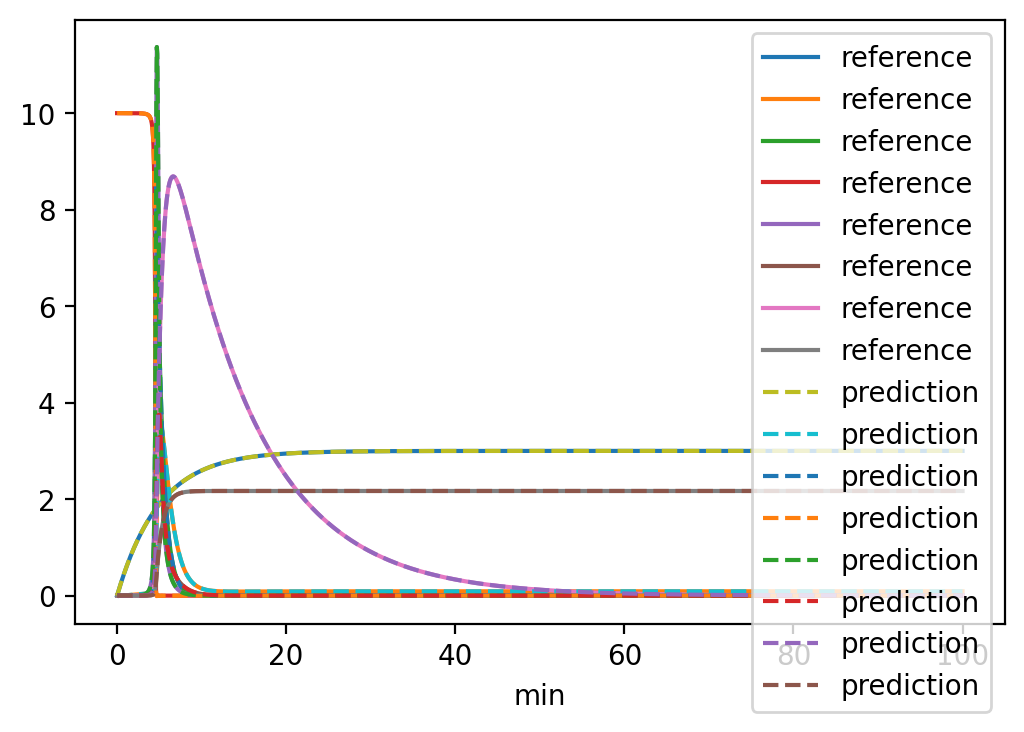

In [17]:
plt.figure(dpi=200)
plt.plot(t_train, c_ref, "-", label="reference")
# plt.plot(t_train, y_train, '.', label="train")
plt.plot(t_train, c_pred, "--", label="prediction")
plt.xlabel("min")
plt.legend()
plt.show()

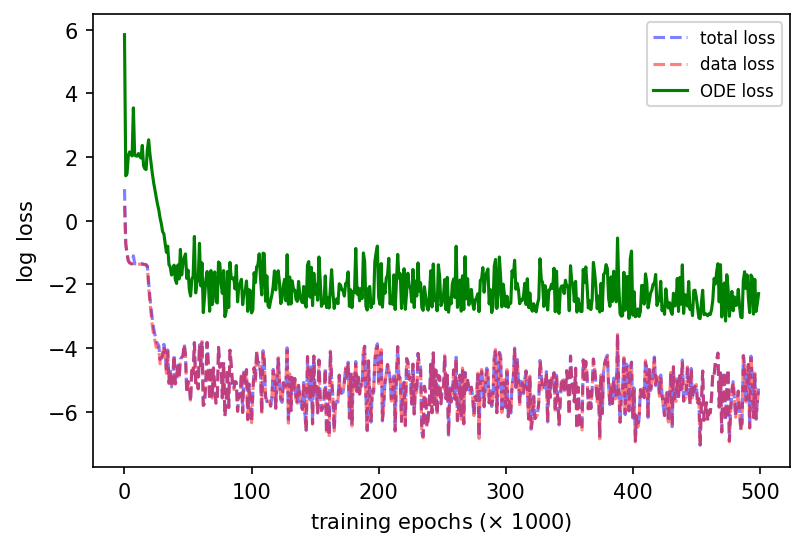

In [46]:
plt.figure(dpi=150)
plt.plot(np.log10(loss)[::1000], "b--", label="total loss", alpha=0.5)
plt.plot(np.log10(data_loss)[::1000], "r--", label="data loss", alpha=0.5)
plt.plot(np.log10(ode_loss)[::1000], "g-", label="ODE loss", alpha=1)
plt.xlabel('training epochs ($\\times$ 1000)')
plt.ylabel('$\\log$ loss')
plt.legend(fontsize=8)
plt.show()

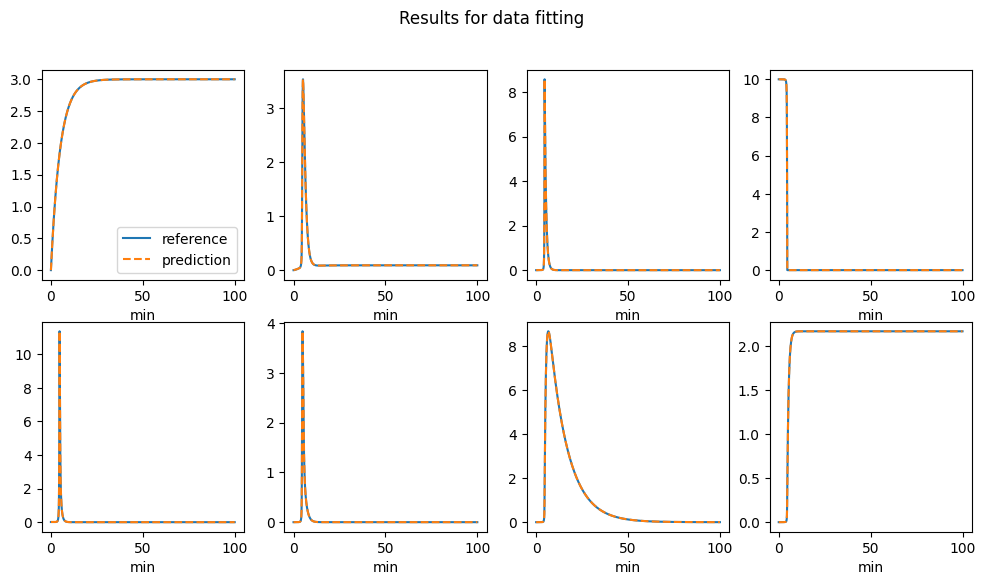

In [19]:
# plt.figure(dpi=100)
plt.figure(figsize=(12, 6), dpi=100)
plt.subplot(2, 4, 1)
plt.plot(t_train, c_ref[:, 0:1], "-", label="reference")
plt.plot(t_train, c_pred[:, 0:1], "--", label="prediction")
plt.xlabel("min")
plt.legend()

# plt.figure(dpi=100)
plt.subplot(2, 4, 2)
plt.plot(t_train, c_ref[:, 1:2], "-", label="reference")
plt.plot(t_train, c_pred[:, 1:2], "--", label="prediction")
plt.xlabel("min")
# plt.legend()

# plt.figure(dpi=100)
plt.subplot(2, 4, 3)
plt.plot(t_train, c_ref[:, 2:3], "-", label="reference")
plt.plot(t_train, c_pred[:, 2:3], "--", label="prediction")
plt.xlabel("min")
# plt.legend()

# plt.figure(dpi=100)
plt.subplot(2, 4, 4)
plt.plot(t_train, c_ref[:, 3:4], "-", label="reference")
plt.plot(t_train, c_pred[:, 3:4], "--", label="prediction")
plt.xlabel("min")
# plt.legend()

# plt.figure(dpi=100)
plt.subplot(2, 4, 5)
plt.plot(t_train, c_ref[:, 4:5], "-", label="reference")
plt.plot(t_train, c_pred[:, 4:5], "--", label="prediction")
plt.xlabel("min")
# plt.legend()

# plt.figure(dpi=100)
plt.subplot(2, 4, 6)
plt.plot(t_train, c_ref[:, 5:6], "-", label="reference")
plt.plot(t_train, c_pred[:, 5:6], "--", label="prediction")
plt.xlabel("min")
# plt.legend()

# plt.figure(dpi=100)
plt.subplot(2, 4, 7)
plt.plot(t_train, c_ref[:, 6:7], "-", label="reference")
plt.plot(t_train, c_pred[:, 6:7], "--", label="prediction")
plt.xlabel("min")
# plt.legend()

# plt.figure(dpi=100)
plt.subplot(2, 4, 8)
plt.plot(t_train, c_ref[:, 7:8], "-", label="reference")
plt.plot(t_train, c_pred[:, 7:8], "--", label="prediction")
plt.xlabel("min")
# plt.legend()

plt.suptitle("Results for data fitting")
plt.show()

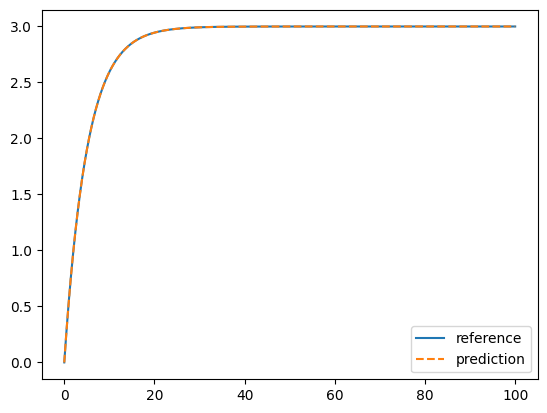

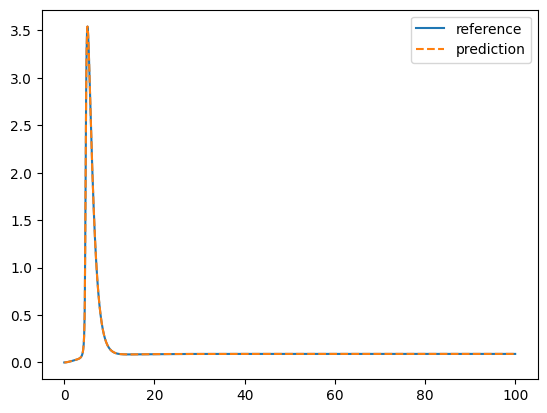

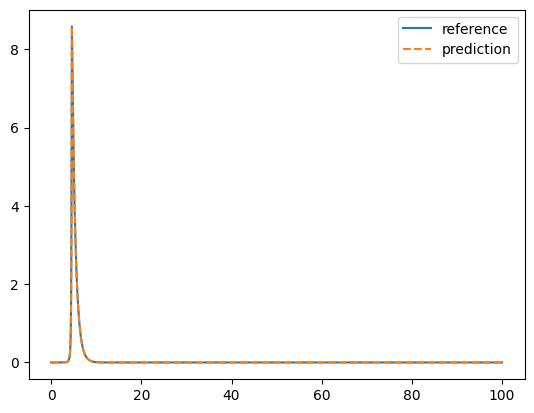

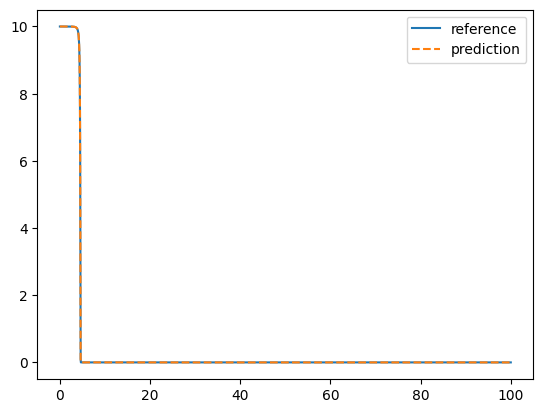

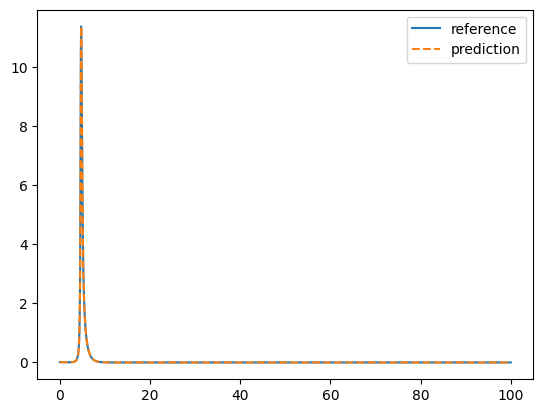

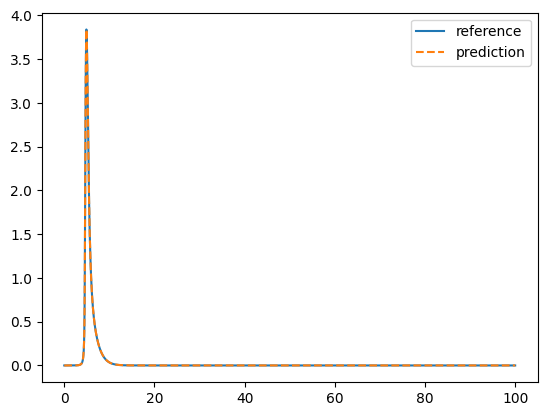

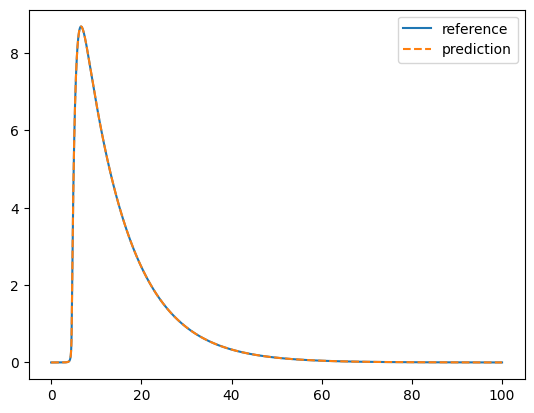

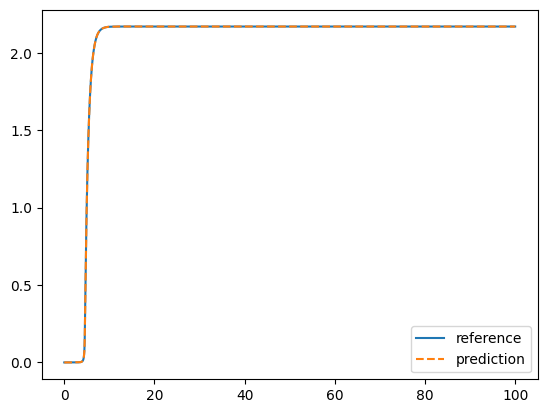

In [20]:
plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 0:1], "-", label="reference")
plt.plot(t_train, c_pred[:, 0:1], "--", label="prediction")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 1:2], "-", label="reference")
plt.plot(t_train, c_pred[:, 1:2], "--", label="prediction")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 2:3], "-", label="reference")
plt.plot(t_train, c_pred[:, 2:3], "--", label="prediction")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 3:4], "-", label="reference")
plt.plot(t_train, c_pred[:, 3:4], "--", label="prediction")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 4:5], "-", label="reference")
plt.plot(t_train, c_pred[:, 4:5], "--", label="prediction")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 5:6], "-", label="reference")
plt.plot(t_train, c_pred[:, 5:6], "--", label="prediction")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 6:7], "-", label="reference")
plt.plot(t_train, c_pred[:, 6:7], "--", label="prediction")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 7:8], "-", label="reference")
plt.plot(t_train, c_pred[:, 7:8], "--", label="prediction")
plt.legend()
plt.show()